Code preliminaries

In [1]:
import  os

import numpy as np
import pandas as pd


from create_df_larger import read_df_larger
df, dfc, all_homes, appliance_min, national_average = read_df_larger()

df = df.rename(columns={'house_num_rooms':'num_rooms',
                        'num_occupants':'total_occupants',
                        'difference_ratio_min_max':'ratio_difference_min_max'})
K_min, K_max = 1,6
F_min, F_max=1,8

from all_functions import *
from features_larger import *

In [2]:
appliance="hvac"
month=6
all_homes = df['%s_%d' %(appliance, month)].dropna().index

Selecting a small subset of the data.

In [8]:
subset = df

In [141]:
cols_to_use = []
for appliance in ["hvac","fridge","wm"]:
    if appliance=="hvac":
        start, end=5, 11
    else:
        start, end = 1, 13
    cols_to_use.append(['%s_%d' %(appliance, month) for month in range(start, end)])
cols_to_use.append(['%s_%d' %("aggregate", month) for month in range(1, 13)])
#cols_to_use.append(["num_rooms", "total_occupants"])

In [142]:
cols_to_use = [item for sublist in cols_to_use for item in sublist]

In [143]:
all_appliance_cols = cols_to_use[:30]

In [144]:
cols_to_use[:3], all_appliance_cols

(['hvac_5', 'hvac_6', 'hvac_7'],
 ['hvac_5',
  'hvac_6',
  'hvac_7',
  'hvac_8',
  'hvac_9',
  'hvac_10',
  'fridge_1',
  'fridge_2',
  'fridge_3',
  'fridge_4',
  'fridge_5',
  'fridge_6',
  'fridge_7',
  'fridge_8',
  'fridge_9',
  'fridge_10',
  'fridge_11',
  'fridge_12',
  'wm_1',
  'wm_2',
  'wm_3',
  'wm_4',
  'wm_5',
  'wm_6',
  'wm_7',
  'wm_8',
  'wm_9',
  'wm_10',
  'wm_11',
  'wm_12'])

In [21]:
subset = subset[cols_to_use]

Considering only the HVAC consumption from these few homes

In [23]:
subset.describe()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,fridge_1,fridge_2,fridge_3,fridge_4,...,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12,num_rooms,total_occupants
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,69.000000,69.000000,70.000000,70.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,205.036814,412.080539,636.001452,704.971163,498.351739,245.376936,49.725839,45.917504,51.852404,59.783502,...,0.194674,0.245970,0.314804,0.343997,0.275535,0.203175,0.140446,0.153229,0.368027,0.279365
std,151.532337,248.719470,346.688686,342.112812,251.262810,151.838024,26.091730,24.035320,23.676131,37.389249,...,0.112433,0.123767,0.150231,0.162603,0.130547,0.109997,0.083780,0.098689,0.218992,0.203463
min,3.054133,2.404883,9.934549,21.709467,40.952965,8.885633,0.000400,0.001067,0.004650,0.004367,...,0.037119,0.006311,0.035424,0.103515,0.081750,0.036228,0.034511,0.032404,0.000000,0.000000
25%,85.337402,240.477646,410.705765,474.509491,320.333954,145.265579,36.670815,35.093853,39.732562,45.639920,...,0.116584,0.160478,0.203853,0.231295,0.182797,0.133977,0.083992,0.086280,0.214286,0.166667
50%,178.892212,340.667389,576.457397,651.919556,467.497955,216.562531,47.795067,42.935131,46.622608,52.166611,...,0.172271,0.214308,0.280743,0.317316,0.249095,0.182937,0.114536,0.130050,0.357143,0.166667
75%,286.896988,542.213196,798.629730,882.773834,620.517303,350.197220,54.734383,51.726284,59.203851,63.063210,...,0.234921,0.305838,0.378678,0.410427,0.336515,0.244589,0.161581,0.172882,0.500000,0.500000
max,894.190308,1385.010742,2130.617920,1834.047852,1386.018921,876.380493,196.560455,191.498642,175.588577,292.664917,...,0.680331,0.656180,0.759299,1.000000,0.755074,0.692575,0.437151,0.612207,1.000000,1.000000


Normalising each column to be on the range (0, 1)

In [145]:
col_max = subset.max()
col_min = subset.min()

In [146]:
col_max.head()

hvac_5     894.190308
hvac_6    1385.010742
hvac_7    2130.617920
hvac_8    1834.047852
hvac_9    1386.018921
dtype: float64

Seems to be working great. All the numbers are in the range(0, 1). Now, doing this for the entire matrix.

In [147]:
subset_normalised = subset.copy()
for col in subset.columns:
    subset_normalised[col] = (subset[col]-col_min[col])/(col_max[col]-col_min[col])

In [148]:
subset_normalised.head()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,fridge_1,fridge_2,fridge_3,fridge_4,...,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12,num_rooms,total_occupants
26,0.268580,0.391562,0.354348,0.485952,0.423089,0.445286,0.277159,0.243278,0.245049,0.173357,...,0.264163,0.451381,0.462876,0.342351,0.318240,0.339887,0.300179,0.184649,0.285714,0.500000
59,0.083667,0.141433,0.211260,0.374507,0.151210,0.083204,0.030538,0.028315,0.035376,0.021497,...,0.314919,0.337543,0.374149,0.323820,0.209625,0.250306,0.484892,0.603718,0.642857,1.000000
94,0.018833,0.046446,0.054788,0.073571,0.038679,0.028250,0.251186,0.230978,0.295161,0.176255,...,0.043213,0.109343,0.102650,0.023547,0.023076,0.055540,0.105099,0.071886,0.071429,0.166667
101,0.211989,0.233945,0.213504,0.255734,0.230129,0.211738,0.121757,0.118470,0.176910,0.120821,...,0.114979,0.220393,0.214252,0.079637,0.106973,0.106339,0.094690,0.066688,0.214286,0.333333
222,0.534035,0.646650,0.503590,0.616900,0.629034,0.663339,0.543033,0.286995,0.192632,1.000000,...,0.790309,0.976471,1.000000,1.000000,0.695549,0.757812,0.930975,0.611228,0.142857,0.666667


Employing matrix factorisation now

In [149]:
import numpy
def matrix_factorization(R, P, Q, K, steps=500, alpha=0.0002, beta=0.02):
    numpy.random.seed(0)

    Q = Q.T
    for step in xrange(steps):
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j]>0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in xrange(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

Choosing K=2 latent features

In [150]:
for K in range(1, 10):
    print K
    prediction = {}
    for count, home in enumerate(subset_normalised.index.values[:]):

        print home, count, len(subset_normalised_copy.index)
        subset_normalised_copy = subset_normalised.copy()
        subset_normalised_copy.ix[home][all_appliance_cols]=np.NAN
        R = subset_normalised_copy.values
        N = len(R)
        M = len(R[0])

        P = numpy.random.rand(N,K)
        Q = numpy.random.rand(M,K)

        nP, nQ = matrix_factorization(R, P, Q, K)
        pred_df = pd.DataFrame(numpy.dot(nP, nQ.T), index=subset_normalised.index, columns=subset_normalised.columns)

        pred = {}
        for col in all_appliance_cols:
            pred[col] = (col_max[col]-col_min[col])*pred_df.ix[home][col] + col_min[col]
        prediction[home] = pred
    prediction_overall = pd.DataFrame(prediction).T
    prediction_overall.to_csv("../data/output/mf_%d.csv" %K)

1
26 0 105
59 1 105
94 2 105
101 3 105
222 4 105
252 5 105
364 6 105
545 7 105
624 8 105
661 9 105
871 10 105
946 11 105
1169 12 105
1283 13 105
1310 14 105
1334 15 105
1415 16 105
1463 17 105
1500 18 105
1642 19 105
1697 20 105
1700 21 105
1790 22 105
1800 23 105
1953 24 105
2129 25 105
2156 26 105
2233 27 105
2242 28 105
2365 29 105
2378 30 105
2470 31 105
2557 32 105
2814 33 105
2859 34 105
2925 35 105
2953 36 105
2986 37 105
3009 38 105
3036 39 105
3367 40 105
3456 41 105
3482 42 105
3577 43 105
3649 44 105
3723 45 105
3778 46 105
3829 47 105
3893 48 105
3967 49 105
4031 50 105
4213 51 105
4297 52 105
4298 53 105
4342 54 105
4505 55 105
4767 56 105
4874 57 105
4946 58 105
4957 59 105
4998 60 105
5026 61 105
5218 62 105
5357 63 105
5371 64 105
5439 65 105
5673 66 105
5677 67 105
5785 68 105
5814 69 105
5817 70 105
6121 71 105
6139 72 105
6266 73 105
6498 74 105
6692 75 105
6836 76 105
6910 77 105
7016 78 105
7390 79 105
7429 80 105
7510 81 105
7641 82 105
7731 83 105
7741 84 105
776

In [220]:
a= {}
for K in range(1,10):
    prediction_overall = pd.read_csv("../data/output/mf_%d.csv" %K, index_col=0)
    gt_overall = subset[all_appliance_cols]
    appliance_accuracy ={}
    for appliance in ["hvac","fridge","wm"]:
    #for appliance in ["hvac"]:
        appliance_cols = [col for col in all_appliance_cols if appliance in col]
        gt = gt_overall[appliance_cols]
        pr = prediction_overall[appliance_cols]
        error = (gt-pr).abs()
        per_error = error/gt
        per_error[per_error>1]=1
        per_accuracy = 100*(1-per_error)
        appliance_accuracy[appliance]=per_accuracy.mean().mean()
        a[K]=appliance_accuracy

In [223]:
%matplotlib inline

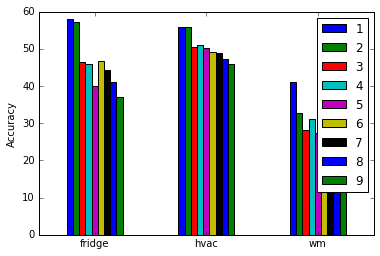

In [232]:
import matplotlib.pyplot as plt
pd.DataFrame(a).plot(kind="bar",rot=0,legend=True)
plt.ylabel("Accuracy")

In [202]:
per_accuracy.median().median()

51.60486639197259

In [100]:
gt_overall = subset[all_appliance_cols]

In [136]:
appliance_accuracy ={}
#for appliance in ["hvac","fridge","wm"]:
for appliance in ["hvac"]:
    appliance_cols = [col for col in all_appliance_cols if appliance in col]
    gt = gt_overall[appliance_cols]
    pr = prediction_overall[appliance_cols]
    error = (gt-pr).abs()
    per_error = error/gt
    per_error[per_error>1]=1
    per_accuracy = 100*(1-per_error)
    appliance_accuracy[appliance]=per_accuracy.mean().mean()
    

In [134]:
gt_overall['fridge_1'].dropna().describe()

count     69.000000
mean      49.725839
std       26.091730
min        0.000400
25%       36.670815
50%       47.795067
75%       54.734383
max      196.560455
Name: fridge_1, dtype: float64

In [138]:
per_accuracy.describe()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,48.620832,59.347882,55.700367,59.125063,59.544016,52.778607
std,35.866989,34.667128,32.088596,31.597226,31.486567,34.565091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.848216,32.710384,42.398268,43.542319,19.402305
50%,60.122247,74.105983,66.911682,71.047190,71.054043,61.591358
75%,78.434722,87.521689,81.044316,82.362428,84.454519,82.102202
max,98.153783,99.983375,98.703433,99.840635,98.872071,99.946246


In [135]:
appliance_accuracy

{'fridge': 57.33235037184128,
 'hvac': 55.852794524403635,
 'wm': 32.64264145040134}

Great, our method predicts energy usage to be 790 units when true consumption was 760 units. Error of 30 units only, which means the method worked really great here.

Now, I'll try to remove more entries from the matrix. Specifically, I'll remove an entry from the same month for a different home. I'll remove the entry for home #1169. Since, this entry is not the lowest one, I don't need to normalise again from scratch. The true energy for this home is ~330 units.

In [21]:
subset_hvac_normalised.loc[1169, 'hvac_7'] = np.NAN

Confirming that we have only 2 missing values in the matrix.

In [26]:
assert(subset_hvac_normalised.isnull().sum().sum()==2)

In [27]:
numpy.random.seed(0)
R = subset_hvac_normalised.values
N = len(R)
M = len(R[0])
K = 2

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)

In [28]:
pred_df = pd.DataFrame(numpy.dot(nP, nQ.T), index=subset_hvac_normalised.index, columns=subset_hvac_normalised.columns)

In [29]:
pred_df

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,0.525252,0.546342,0.565182,0.540056,0.470007,0.558244
59,0.195344,0.203010,0.212359,0.204149,0.176959,0.206131
94,0.213187,0.219816,0.252969,0.255115,0.214288,0.210422
101,0.271078,0.280661,0.307573,0.302925,0.258419,0.277217
222,0.849419,0.888274,0.856032,0.785051,0.702246,0.942496
364,0.517585,0.540781,0.527469,0.487283,0.433748,0.570288
545,0.674622,0.699993,0.746862,0.725564,0.624575,0.702636
624,0.134171,0.139255,0.148077,0.143600,0.123757,0.140059
661,0.570436,0.588821,0.668958,0.670553,0.565474,0.568465
871,0.204926,0.213444,0.216974,0.205323,0.179850,0.220218


In [30]:
pred_1169_7 = pred_df.loc[1169, 'hvac_7']

In [31]:
(col_max['hvac_7']-col_min['hvac_7'])*pred_1169_7 + col_min['hvac_7']

320.40357004031023

We predict the usage to be 320 units when the actual consumption is about 330 units. Again, fairly good recommendation!

Now, making the matrix much more sparse. 

In [48]:
subset_hvac_sparse = subset_hvac.copy()

In [49]:
for col in subset_hvac_sparse.columns:
    for row in subset_hvac_sparse.index:
        if numpy.random.random()>0.6:
            subset_hvac_sparse.loc[row, col]=np.NaN

In [51]:
subset_hvac_sparse.isnull().sum().sum()

35

We now have 35 missing entries in the marix.

Month wise #missing entries is 

In [53]:
subset_hvac_sparse.isnull().sum()

hvac_5     7
hvac_6     5
hvac_7     3
hvac_8     6
hvac_9     8
hvac_10    6
dtype: int64

Home wise #missing entries is

In [55]:
subset_hvac_sparse.isnull().sum(axis=1).describe()

count    14.000000
mean      2.500000
std       1.506397
min       0.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
dtype: float64

In [56]:
subset_hvac_sparse

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,242.395737,543.781433,NaN,902.418823,NaN,NaN
59,NaN,NaN,457.950378,NaN,NaN,NaN
94,NaN,66.621819,126.121681,NaN,92.979385,33.392750
101,191.965454,NaN,462.708923,NaN,350.491455,NaN
222,NaN,NaN,NaN,NaN,887.044739,NaN
364,236.925064,535.010376,736.468933,850.080811,642.858459,378.799713
545,350.414551,NaN,1065.381104,1120.907593,NaN,375.303040
624,NaN,NaN,307.978149,389.598602,NaN,22.099518
661,221.594315,648.794067,NaN,NaN,756.477905,NaN
871,84.128731,231.698425,403.408813,514.838928,NaN,140.866745


Now, normalising this matrix.

In [57]:
col_max = subset_hvac_sparse.max()
col_min = subset_hvac_sparse.min()

In [58]:
subset_hvac_sparse_normalised = subset_hvac_sparse.copy()
for col in subset_hvac.columns:
    subset_hvac_sparse_normalised[col] = (subset_hvac_sparse[col]-col_min[col])/(col_max[col]-col_min[col])

In [59]:
subset_hvac_sparse_normalised

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,0.594350,0.819619,NaN,0.458692,NaN,NaN
59,NaN,NaN,0.282465,NaN,NaN,NaN
94,NaN,0.000000,0.000000,NaN,0.000000,0.026268
101,0.404966,NaN,0.286515,NaN,0.324296,NaN
222,NaN,NaN,NaN,NaN,1.000000,NaN
364,0.573806,0.804553,0.519550,0.411879,0.692486,0.829691
545,1.000000,NaN,0.799531,0.654120,NaN,0.821558
624,NaN,NaN,0.154803,0.000000,NaN,0.000000
661,0.516233,1.000000,NaN,NaN,0.835572,NaN
871,0.000000,0.283553,0.236037,0.112021,NaN,0.276255


In [60]:
numpy.random.seed(0)
R = subset_hvac_sparse_normalised.values
N = len(R)
M = len(R[0])
K = 2

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)

In [61]:
pred_df = pd.DataFrame(numpy.dot(nP, nQ.T), index=subset_hvac_normalised.index, columns=subset_hvac_normalised.columns)

In [62]:
pred_df

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,0.626751,0.725728,0.574429,0.507956,0.723713,0.715155
59,0.446145,0.471976,0.372976,0.255860,0.509112,0.500437
94,0.166016,0.232958,0.184941,0.231032,0.197225,0.197316
101,0.331219,0.432536,0.343024,0.384554,0.389111,0.387425
222,0.801248,0.779461,0.614957,0.297987,0.905082,0.885557
364,0.650821,0.702224,0.555131,0.405750,0.744536,0.732676
545,0.817796,0.958538,0.758860,0.690261,0.945887,0.935392
624,0.121631,0.140518,0.111219,0.097817,0.140404,0.138725
661,0.642869,0.870370,0.690618,0.819481,0.759418,0.757931
871,0.283462,0.285528,0.225425,0.128576,0.321522,0.315180


Now, let us pick up a few entries. Home #59 had 4/5 missing entries!

In [69]:
home_pred = {}
home = 59
home_pred[home] = {}
for month in range(5, 11):
    home_pred[59][month] = (col_max['hvac_%d' %month]-col_min['hvac_%d' %month])*pred_df.loc[home,'hvac_%d'%month] +col_min['hvac_%d' %month]

In [74]:
pred_59 = pd.DataFrame(home_pred).squeeze()
gt_59 = subset_hvac.ix[59]
gt_59.index=pred_59.index

Here's the GT and prediction for this home. 

In [76]:
pd.DataFrame({"gt":gt_59, "pred":pred_59})

,gt,pred
5,77.613205,202.930850
6,197.951508,341.393123
7,457.950378,564.280025
8,700.443054,675.651405
9,244.340973,497.247409
10,81.064682,237.247047


Given that we had 1/6 records for home #59. Our predictions aren't all that bad.